<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week6/Lec6_PolyKernel_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

First five rows and col values 
X1 : 
 [[ 0.51140654 -0.39957964]
 [ 1.66711722 -0.23043739]
 [ 1.03923847  0.07187169]
 [-0.98549711  0.20753221]
 [ 1.67107803 -0.17635011]]  
 y2 :
 [ 1  1 -1 -1  1]


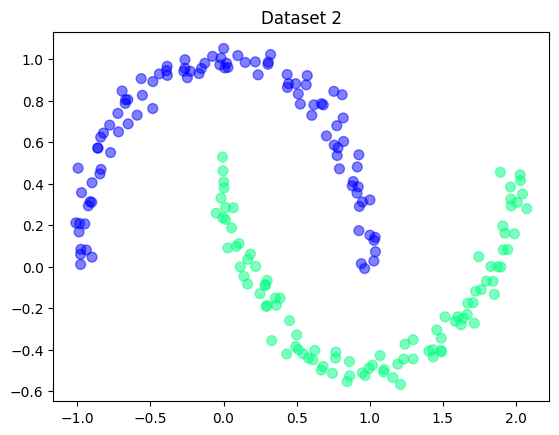

In [4]:
X1, y1 = make_moons(n_samples=200, noise=.05)
y1 = np.where(y1 <= 0, -1, 1)
X1_b = X1_b = np.c_[np.ones((len(X1), 1)), X1]

print("First five rows and col values \nX1 : \n",X1[:5], " \n y2 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

#### First, let's try the soft-margin classifier:

In [ ]:
w = np.zeros(len(X1_b[0]))
eta = 0.001
n = 100
cost_ = 1

for epoch in range(1,n):
  lambda_ = 1/epoch
  for i, x in enumerate(X1_b):
       if cost_ < 0:
            break # makes sure that cost is non-negative - stops overfitting
       if (y1[i]*np.dot(X1_b[i], w)) < 1:
           w = w + eta *  ( (X1_b[i] * y1[i]) + (-2  *(lambda_)* w) ) + eta * (- cost_)
           cost_ = cost_ - eta * (1+cost_)
           print(cost_)

       else:
           w = w - eta * (2  *(lambda_)* w)

In [6]:
# prediction
pred = np.dot(X1_b, w)
y_pred = [1 if val > 0 else -1 for val in pred]
accuracy_score(y1, y_pred)

0.685

Lot's of misclassification since the dataset is not linearly separable ...

In [8]:
# defining a polynomial kernel ...
def polynomial_kernal(X,Z, c, degree):
    return (c + X.dot(Z.T))**degree #(c + X.y)^degree

In [ ]:
# training ...
X = X1.copy()
y = y1.copy()

epochs = 100
learning_rate = 0.001
alpha = np.random.random(X.shape[0])
b = 0
C = 1.0
ones = np.ones(X.shape[0])
y_mul_kernal = np.outer(y, y) * polynomial_kernal(X = X, Z = X, c = 1.0, degree = 2) # yi yj K(xi, xj)

for i in range(epochs):
    gradient = ones - y_mul_kernal.dot(alpha) # 1 – yk ∑ αj yj K(xj, xk)

    alpha += learning_rate * gradient # α = α +/- η*(1 – yk ∑ αj yj K(xj, xk)) to maximize LD, the Langrangian dual
    alpha[alpha > C] = C # 0<α<C
    alpha[alpha < 0] = 0 # 0<α<C

    loss = np.sum(alpha) - 0.5 * np.sum(np.outer(alpha, alpha) * y_mul_kernal) # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
    #print(loss)
    alpha_index = np.where((alpha) > 0 & (alpha < C))[0]

    # for intercept b, we will only consider α which are 0<α<C
    b_list = []
    for index in alpha_index:
        b_list.append(y[index] - (alpha * y).dot(polynomial_kernal(X = X, Z = X[index], c = 1.0, degree = 2)))

        b = np.mean(b_list) # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }


In [11]:
def predict(X):
  temp = (alpha * y).dot(polynomial_kernal(X = X, Z = X, c = 1.0, degree = 2)) + b
  return np.sign(temp)

In [18]:
y_pred = predict(X = X)
accuracy_score(y1, y_pred)

0.875

#### Assignment: Replace the kernel with a radial kernel and change gamma to see if you can get a better result.